# Self-Driving Car

## CNN Based Traffic Sign Recognition Classifier



## Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is array containing raw pixel data of the traffic sign images
- `'labels'` is a 1D array containing the label/class id of the traffic sign.The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### About Data

In [2]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

In [3]:
import matplotlib.pyplot as plt
import random
import csv

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
            axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()
    
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
    
number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index]
    
#plot_figures(figures, 4, 2, labels)


<h1>Personal Note</h1>
Data appears good although occasionally for some reason the image cannot be displayed properly.  Maybe bad images in the dataset?

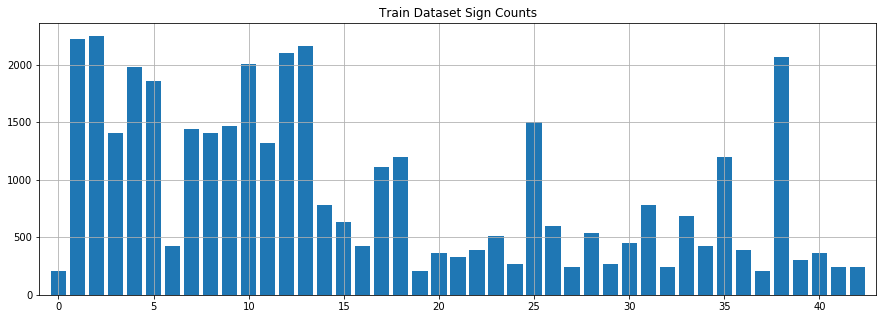

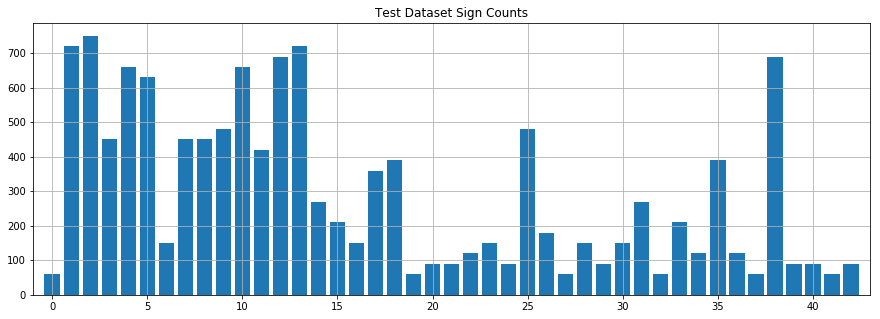

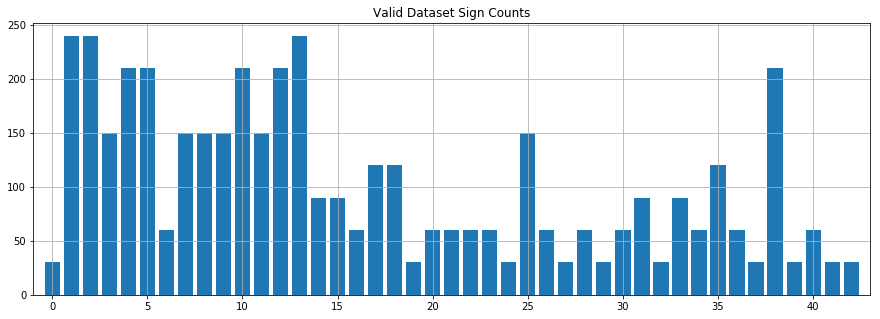

In [4]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.savefig('./images/1.png')
plt.show()


unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.savefig('./images/2.png')
plt.show()

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.savefig('./images/3.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Generate fake data.

### Augumentation and greyscale the image

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
from math import ceil
from sklearn.utils import shuffle

# Convert to grayscale

# Convert training data to greyscale
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

# Convert testing data to greyscale
X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# Convert validation data to greyscale
X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

# Display Shapes
print("Dimention of RGB training set : ")
print(X_train_rgb.shape)
print("Dimention of GRAY training set : ")
print(X_train_gray.shape)
###################################################################################################################
print("Dimention of RGB test set : ")
print(X_test_rgb.shape)
print("Dimention of GRAY test set : ")
print(X_test_gray.shape)
###################################################################################################################
print("Dimention of RGB validation set : ")
print(X_valid_rgb.shape)
print("Dimention of GRAY validation set : ")
print(X_valid_gray.shape)

/home/anoop/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Dimention of RGB training set : 
(39209, 32, 32, 3)
Dimention of GRAY training set : 
(39209, 32, 32, 1)
Dimention of RGB test set : 
(12630, 32, 32, 3)
Dimention of GRAY test set : 
(12630, 32, 32, 1)
Dimention of RGB validation set : 
(4410, 32, 32, 3)
Dimention of GRAY validation set : 
(4410, 32, 32, 1)


In [6]:
# Store the Greyscale images as the training, testing and validation data

X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

In [7]:
# Test the data availabe so that we can see that data had been greyscaled
image_depth_channels = X_train.shape[3]

number_to_stop = 8
figures = {}
random_signs = []
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index].squeeze()
    random_signs.append(index)
    
#plot_figures(figures, int(number_to_stop/2), 2, labels)

## Augumentation (Make Duplicate data)

In [8]:
import cv2

more_X_train = []
more_y_train = []

more2_X_train = []
more2_y_train = []

new_counts_train = counts_train
#print(new_counts_train)
for i in range(n_train):
    if(new_counts_train[y_train[i]] < 3000):
        for j in range(3):
            # cv2.warpAffine crops the input image 
            dx, dy = np.random.randint(-1.7, 1.8, 2)
            M = np.float32([[1, 0, dx], [0, 1, dy]])
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
            dst = dst[:,:,None]
            more_X_train.append(dst)
            more_y_train.append(y_train[i])

            #cv2.getPerspectiveTransform ,transforms and saves
            random_higher_bound = random.randint(27, 32)
            random_lower_bound = random.randint(0, 5)
            points_one = np.float32([[0,0],[32,0],[0,32],[32,32]])
            points_two = np.float32([[0, 0], [random_higher_bound, random_lower_bound], [random_lower_bound, 32],[32, random_higher_bound]])
            M = cv2.getPerspectiveTransform(points_one, points_two)
            dst = cv2.warpPerspective(X_train[i], M, (32,32))
            more2_X_train.append(dst)
            more2_y_train.append(y_train[i])
            
            #cv2.getRotationMatrix2D rotates the image
            tilt = random.randint(-12, 12)
            M = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), tilt, 1)
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
            more2_X_train.append(dst)
            more2_y_train.append(y_train[i])
            
            new_counts_train[y_train[i]] += 2
    
more_X_train = np.array(more_X_train)
more_y_train = np.array(more_y_train)
X_train = np.concatenate((X_train, more_X_train), axis=0)
y_train = np.concatenate((y_train, more_y_train), axis=0)

more2_X_train = np.array(more_X_train)
more2_y_train = np.array(more_y_train)
more2_X_train = np.reshape(more2_X_train, (np.shape(more2_X_train)[0], 32, 32, 1))
X_train = np.concatenate((X_train, more2_X_train), axis=0)
y_train = np.concatenate((y_train, more2_y_train), axis=0)

X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

New Dataset Size : 94444


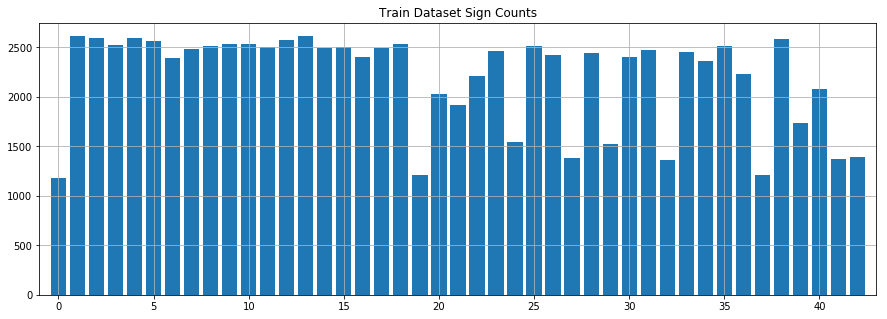

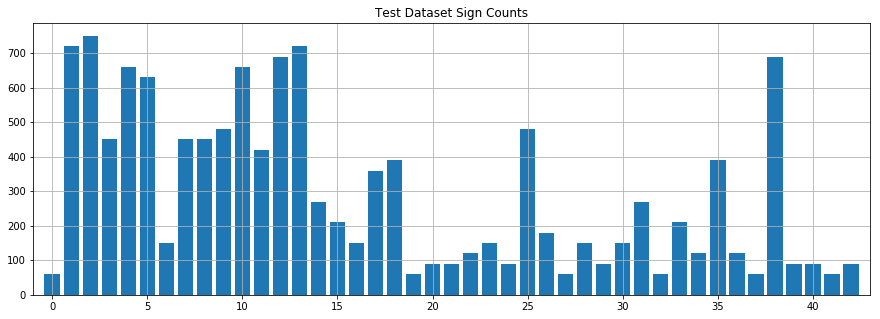

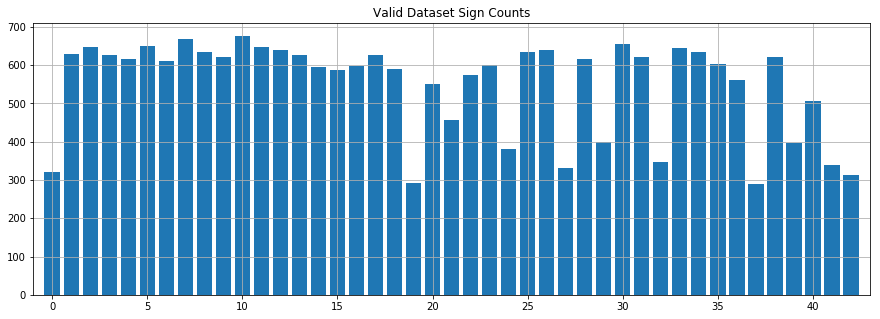

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("New Dataset Size : {}".format(X_train.shape[0]))

unique, counts = np.unique(y_train, return_counts=True)


# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])
#
plt.bar(unique, counts)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.savefig('./images/4.png')
plt.show()


unique, counts = np.unique(y_test, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])
#

plt.bar(unique, counts)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.savefig('./images/5.png')
plt.show()

unique, counts = np.unique(y_valid, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])
#

plt.bar(unique, counts)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.savefig('./images/6.png')
plt.show()

In [10]:
def normalize(im):
    return -np.log(1/((1 + im)/257) - 1)

X_train_normalized = X_train/127.5-1
X_test_normalized = X_test/127.5-1

number_to_stop = 8
figures = {}
count = 0
for i in random_signs:
    labels[count] = name_values[y_train[i]][1].decode('ascii')
    figures[count] = X_train_normalized[i].squeeze()
    count += 1;
    
#plot_figures(figures, int(number_to_stop/2), 2, labels)


In [11]:
# Get normalized dataset

In [12]:
X_train = X_train_normalized
X_test = X_test_normalized

### Model Architecture


My final model consisted of the following layers:

|      Layer       		|     Description	 							|
|:---------------------:|:---------------------------------------------:|
| Input         		| 32x32x1 grayscale image   					|
| Convolution 5x5     	| 2x2 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 					|
| Convolution 5x5	    | 2x2 stride, valid padding, outputs 10x10x16	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 					|
| Convolution 1x1	    | 2x2 stride, valid padding, outputs 1x1x412    |
| RELU					|												|
| Fully connected		| input 412, output 122        					|
| RELU					|												|
| Dropout				| 50% keep        								|
| Fully connected		| input 122, output 84 							|
| RELU					|												|
| Dropout				| 50% keep 										|
| Fully connected		| input 84, output 43							|



In [13]:
#define basic property of a layer
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    print(x.shape)
    return tf.nn.relu(x)

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    W_one = tf.Variable(tf.truncated_normal(shape=(5, 5, image_depth_channels, 6), mean = mu, stddev = sigma))
    b_one = tf.Variable(tf.zeros(6))
    layer_one = conv2d(x, W_one, b_one, 1)
    
    layer_one = tf.nn.max_pool(layer_one, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_one.shape)
    print()
    
    W_two = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    b_two = tf.Variable(tf.zeros(16))
    layer_two = conv2d(layer_one, W_two, b_two, 1)

    layer_two = tf.nn.max_pool(layer_two, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_two.shape)
    print()
    
    W_two_a = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 412), mean = mu, stddev = sigma))
    b_two_a = tf.Variable(tf.zeros(412))
    layer_two_a = conv2d(layer_two, W_two_a, b_two_a, 1)
    print(layer_two_a.shape)
    print()
    
    flat = flatten(layer_two_a)

    W_three = tf.Variable(tf.truncated_normal(shape=(412, 122), mean = mu, stddev = sigma))
    b_three = tf.Variable(tf.zeros(122))
    layer_three = tf.nn.relu(tf.nn.bias_add(tf.matmul(flat, W_three), b_three))
    layer_three = tf.nn.dropout(layer_three, keep_prob)
    
    W_four = tf.Variable(tf.truncated_normal(shape=(122, 84), mean = mu, stddev = sigma))
    b_four = tf.Variable(tf.zeros(84))
    layer_four = tf.nn.relu(tf.nn.bias_add(tf.matmul(layer_three, W_four), b_four))
    layer_four = tf.nn.dropout(layer_four, keep_prob)
    
    W_five = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b_five = tf.Variable(tf.zeros(43))
    layer_five = tf.nn.bias_add(tf.matmul(layer_four, W_five), b_five)
    
    return layer_five

x = tf.placeholder(tf.float32, (None, 32, 32, image_depth_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

In [14]:
### Train your model here.

EPOCHS = 40
BATCH_SIZE = 256
train=0
rate = 0.00097
print("CNN Structure details ")

##CALL CNN##
logits = LeNet(x)
############

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

CNN Structure details 
(?, 28, 28, 6)
(?, 14, 14, 6)

(?, 10, 10, 16)
(?, 5, 5, 16)

(?, 1, 1, 412)
(?, 1, 1, 412)



In [15]:
if train==1:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        validation_accuracy_figure = []
        test_accuracy_figure = []
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            validation_accuracy = evaluate(X_valid, y_valid)
            validation_accuracy_figure.append(validation_accuracy)

            test_accuracy = evaluate(X_train, y_train)
            test_accuracy_figure.append(test_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")

In [16]:
if train==1:
    plt.plot(test_accuracy_figure)
    plt.title("Test Accuracy")
    plt.savefig('./images/8.png')
    plt.show()

    plt.plot(validation_accuracy_figure)
    plt.title("Validation Accuracy")
    plt.savefig('./images/9.png')
    plt.show()

Display Accuracy on test set

In [17]:
if train==0:
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        train_accuracy = evaluate(X_train, y_train)
        print("Train Accuracy = {:.3f}".format(train_accuracy))

        valid_accuracy = evaluate(X_valid, y_valid)
        print("Valid Accuracy = {:.3f}".format(valid_accuracy))    

        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 1.000
Valid Accuracy = 0.941
Test Accuracy = 0.943


# Testing

### Load and Output the Images

In [18]:
import glob
import cv2

my_images = sorted(glob.glob('./mysigns/*.png'))
my_labels = np.array([1, 22, 35, 15, 37, 18,40,17])

figures = {}
labels = {}
my_signs = []
index = 0
#count=0
for my_image in my_images:
    #count=count+1
    img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    
    my_signs.append(img)
    figures[index] = img
    labels[index] = name_values[my_labels[index]][1].decode('ascii')
    index += 1

#plot_figures(figures, 4, 2, labels)


In [19]:
my_signs = np.array(my_signs)
my_signs_gray = np.sum(my_signs/3, axis=3, keepdims=True)
my_signs_normalized = my_signs_gray/127.5-1

number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    labels[i] = name_values[my_labels[i]][1].decode('ascii')
    figures[i] = my_signs_gray[i].squeeze()
    
#plot_figures(figures,int(number_to_stop/2), 2, labels)


### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(my_signs_normalized, my_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
My Data Set Accuracy = 1.000


### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
my_single_item_array = []
my_single_item_label_array = []

for i in range(number_to_stop):
    my_single_item_array.append(my_signs_normalized[i])
    my_single_item_label_array.append(my_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image 1
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 2
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 3
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 4
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 5
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 6
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 7
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 8
Image Accuracy = 1.000



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenet


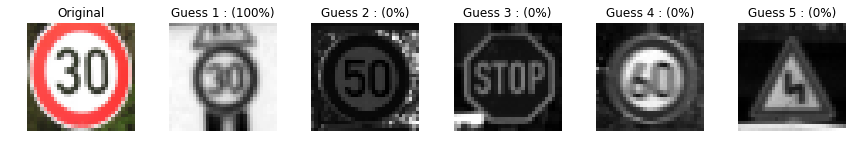

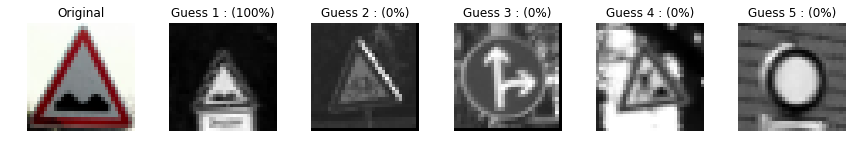

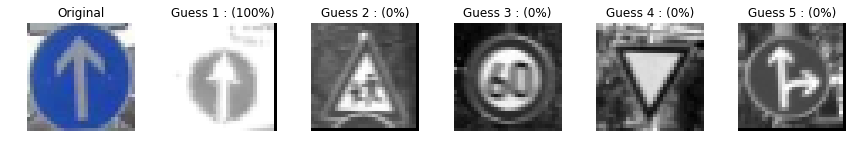

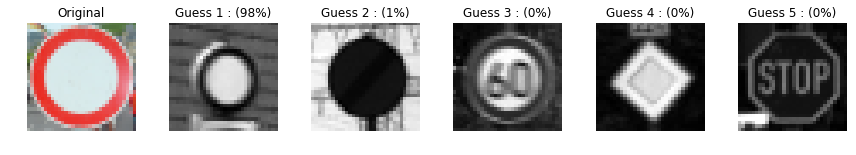

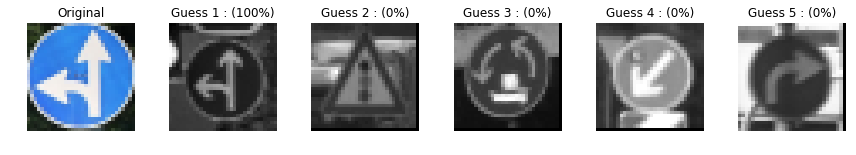

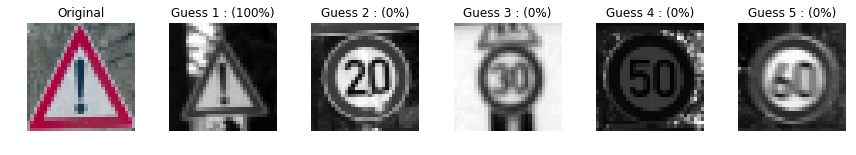

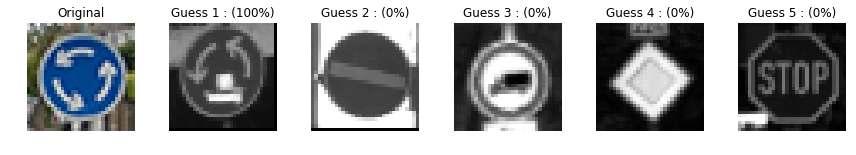

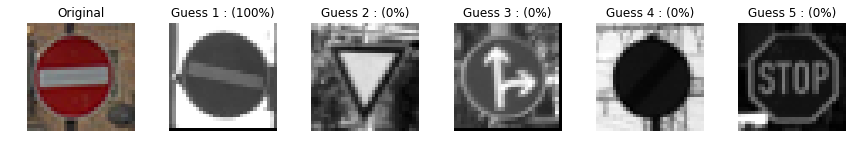

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_signs_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_signs_normalized, keep_prob: 1.0})


    for i in range(number_to_stop):
        figures = {}
        labels = {}
        
        figures[0] = my_signs[i]
        labels[0] = "Original"
        
        for j in range(k_size):

            labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
            

        plot_figures(figures, 1, 6, labels)